<a href="https://colab.research.google.com/github/jivitheshreddy/INFO-5731-Srping2023/blob/main/INFO5731_Assignment_Three_fall2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets). 


In [ ]:
# Write your code here
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
Data=pd.read_csv('Reviews_Movie.csv')

In [ ]:
Data.head()

,Unnamed: 0,Review
0,0,whether orgies showcasing various bodily fluid...
1,1,so many reviews praise film level debauchery s...
2,2,this film felt like written directed high scho...
3,3,in opening scene babylon elephant pickup empti...
4,4,after interesting opening scene main character...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# create a bigram count vectorizer object
Trigram_count_vectorizer = CountVectorizer(ngram_range=(3,3))

In [ ]:
X_Trigram = Trigram_count_vectorizer.fit_transform(Data['Review'])

# Creating a DTM
DTM_trigram = pd.DataFrame(X_Trigram.toarray(), columns=Trigram_count_vectorizer.vocabulary_.keys())


In [ ]:
Trigram_count_vectorizer.vocabulary_.keys()

dict_keys(['whether orgies showcasing', 'orgies showcasing various', 'showcasing various bodily', 'various bodily fluids', 'bodily fluids plot', 'fluids plot threads', 'plot threads runtime', 'threads runtime film', 'runtime film damien', 'film damien chazelle', 'damien chazelle fully', 'chazelle fully unrestrained', 'fully unrestrained latest', 'unrestrained latest film', 'latest film la', 'film la la', 'la la land', 'la land whiplash', 'land whiplash favorite', 'whiplash favorite films', 'favorite films im', 'films im big', 'im big fan', 'big fan chazelles', 'fan chazelles directorial', 'chazelles directorial style', 'directorial style he', 'style he shows', 'he shows flashes', 'shows flashes brilliance', 'flashes brilliance often', 'brilliance often throughout', 'often throughout babylon', 'throughout babylon indulge', 'babylon indulge extreme', 'indulge extreme tendencies', 'extreme tendencies well', 'tendencies well modern', 'well modern hollywood', 'modern hollywood epicthere', '

<Axes: >

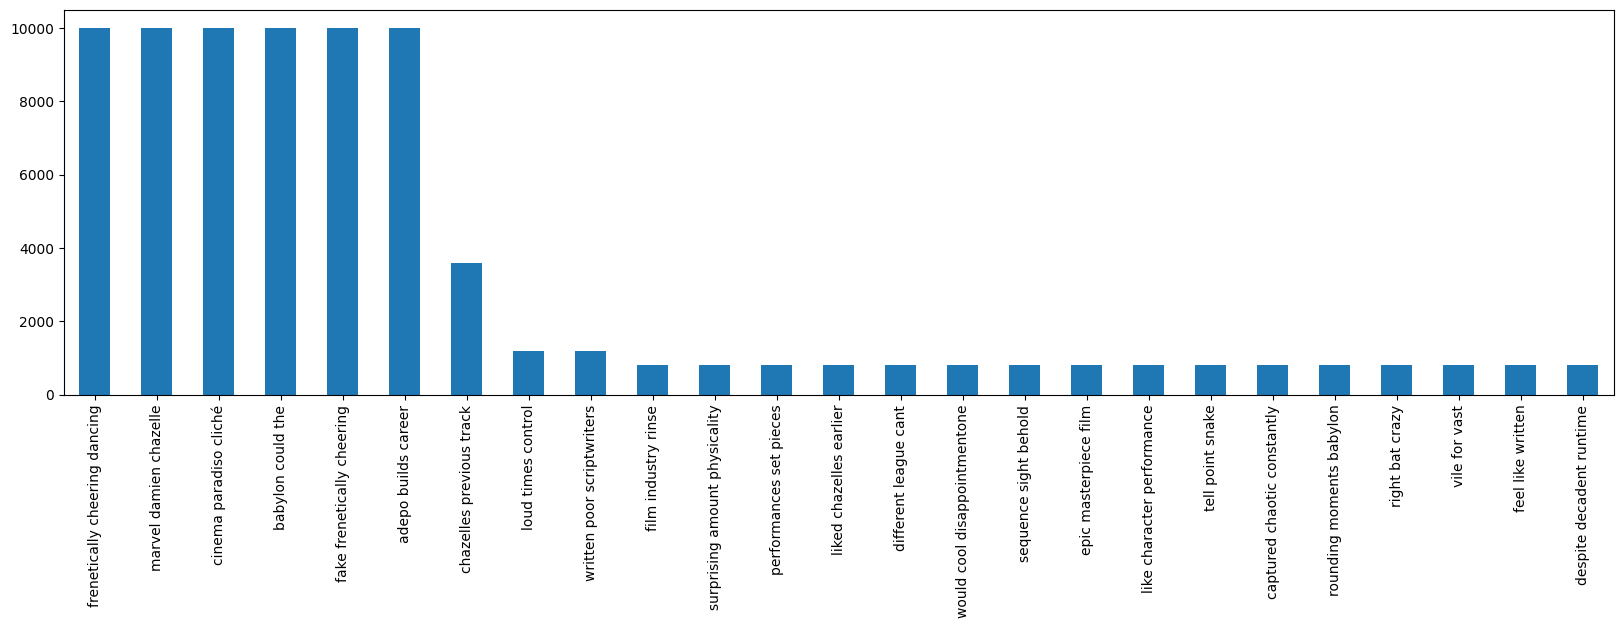

In [ ]:
DTM_trigram.sum().sort_values(ascending=False).head(25).plot.bar(figsize=(20,5)) 

In [ ]:
# Create a CountVectorizer object for unigrams
unigram_count_vectorizer = CountVectorizer()

unigram_counts = unigram_count_vectorizer.fit_transform(Data['Review'])

bigram_count_vectorizer = CountVectorizer(ngram_range=(2, 2))

bigram_counts = bigram_count_vectorizer.fit_transform(Data['Review'])

bigram_vocab = bigram_count_vectorizer.get_feature_names_out()

unigram_indices = [unigram_count_vectorizer.vocabulary_[bigram.split()[1]] for bigram in bigram_vocab]

unigram_counts_subset = unigram_counts[:, unigram_indices]

probabilities = bigram_counts.sum(axis=0) / unigram_counts_subset.sum(axis=0)

probabilities_df = pd.DataFrame(probabilities.T, index=bigram_vocab, columns=["probability"])


In [ ]:
probabilities_df

,probability
10 minutes,0.166667
10 people,0.055556
104 176,1.000000
109 found,0.038462
13 movie,0.016949
...,...
youre left,0.333333
youre sat,1.000000
youve seen,0.333333
zhu sidney,0.333333


In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag, ne_chunk
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:


# Define a function to extract noun phrases from a review
def extract_noun_phrases(text):
    tokens = word_tokenize(text)
    tagged = pos_tag(tokens)
    tree = ne_chunk(tagged)
    noun_phrases = []
    for subtree in tree.subtrees():
        if subtree.label() == 'NP':
            noun_phrase = " ".join([word for word, tag in subtree.leaves()])
            noun_phrases.append(noun_phrase)
    return noun_phrases

# Extract all noun phrases from the dataset
all_noun_phrases = []
for review in Data['Review']:
    noun_phrases = extract_noun_phrases(review)
    all_noun_phrases.extend(noun_phrases)
    
# Get the frequency of each noun phrase in the dataset
noun_phrase_freq = nltk.FreqDist(all_noun_phrases)

# Calculate the relative frequency of each noun phrase in each review
relative_freq = []
for review in Data['Review']:
    noun_phrases = extract_noun_phrases(review)
    if len(noun_phrases) > 0:
        max_freq = max([noun_phrase_freq[noun_phrase] for noun_phrase in noun_phrases])
        rel_freq = {noun_phrase: noun_phrase_freq[noun_phrase] / max_freq for noun_phrase in noun_phrases}
        relative_freq.append(rel_freq)
    else:
        relative_freq.append({})

    
# Create a table of relative frequencies
relative_freq_df = pd.DataFrame(relative_freq)


KeyboardInterrupt: ignored

# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program: 

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [ ]:
# Write your code here

import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Define the documents (reviews, tweets, etc.)

# Define a query to rank the documents against
query = "An Outstanding movie with a haunting performance and best character development"

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the documents using the vectorizer
doc_vectors = vectorizer.fit_transform(Data['Review'])

# Transform the query using the vectorizer
query_vector = vectorizer.transform([query])

# Calculate cosine similarities between the query and documents
cosine_similarities = cosine_similarity(query_vector, doc_vectors).flatten()

# Sort the documents by their cosine similarity to the query
ranked_docs = np.argsort(cosine_similarities)[::-1]

# Create a pandas DataFrame to store the results
data = {"document": Data['Review'], "cosine_similarity": cosine_similarities}
df = pd.DataFrame(data)

# Add a ranking column to the DataFrame
df["ranking"] = np.arange(1, len(Data['Review'])+1)[ranked_docs]

# Print the DataFrame
print(df)






                                               document  cosine_similarity  \
0     whether orgies showcasing various bodily fluid...           0.003650   
1     so many reviews praise film level debauchery s...           0.030928   
2     this film felt like written directed high scho...           0.000000   
3     in opening scene babylon elephant pickup empti...           0.099250   
4     after interesting opening scene main character...           0.031416   
...                                                 ...                ...   
9995  this movie shows spoiled rotten actors they ge...           0.013057   
9996  wow i came flick without great expectations ma...           0.012183   
9997  i really want understand producers thought who...           0.012667   
9998  all place manic drug fueled debauchery hollywo...           0.045700   
9999  this written poor scriptwriters shot seemingly...           0.035023   

      ranking  
0        1886  
1        4936  
2        2936  

# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model: 

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [ ]:
# Write your code here


import pandas as pd
import gensim
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize



# Tokenize the text data
tokenized_data = [word_tokenize(text) for text in Data["Review"]]

# Train a Word2Vec model
model = Word2Vec(sentences=tokenized_data, vector_size=300, window=5, min_count=1, workers=4)

# Save the model to a file
model.save("word2vec.model")





In [ ]:
!pip install umap-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 63.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82830 sha256=adf2d3a6db0f8a3b12e7362afe443966cb3d54089f67d4f7c1e74c20aeb9d556
  Stored in directory: /root/.cache/pip/wheels/f4/3e/1c/596d0a463d17475af648688443fa4846fef624d1390339e7e9
  Created wheel for pynndescent: filename=pynndescent-0.5.9-py3-none-any.whl size=55620 sha256=b66809a4fab74d1ba96ae4129df2b9e3c595076c277aaa351599077fef38da50
  Stored in directory: /root/.cache/pip/wheels/eb/f2/e3/b8e73d1488d8284d88c9283411561b65bd4f0200abf131a946
Successfully built umap-learn pynndescent


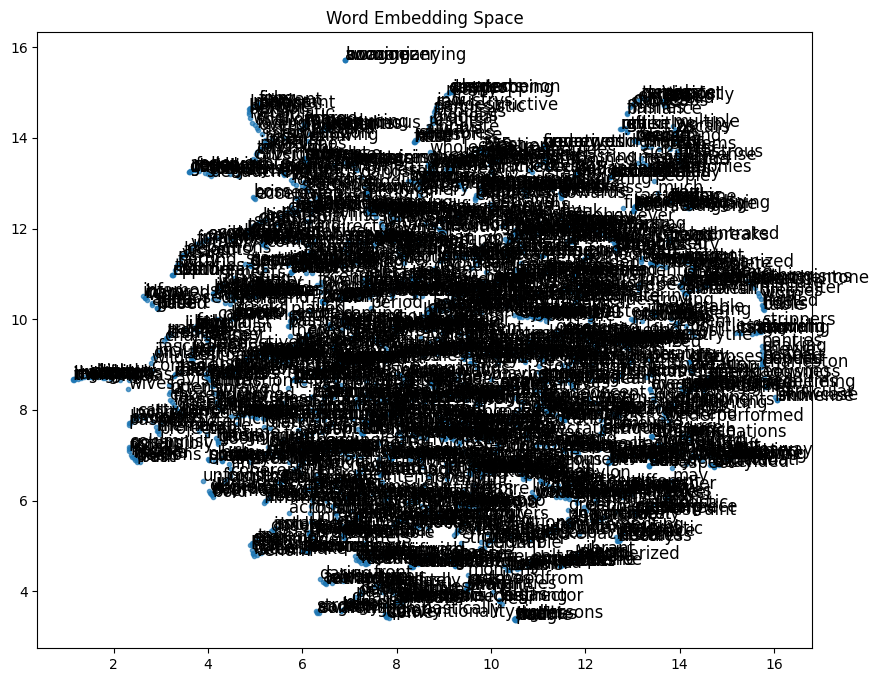

In [ ]:
import umap.umap_ as umap
import matplotlib.pyplot as plt

# Load the Word2Vec model
model = gensim.models.Word2Vec.load("word2vec.model")

# Get the vectors and corresponding words
words = model.wv.index_to_key
vectors = [model.wv[word] for word in words]

# Reduce the dimensionality of the vectors using UMAP
umap_embeddings = umap.UMAP(n_neighbors=5, 
                            n_components=2, 
                            metric='cosine').fit_transform(vectors)

# Visualize the embeddings using a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], marker='.', alpha=0.7)
for i, word in enumerate(words):
    plt.annotate(word, xy=(umap_embeddings[i, 0], umap_embeddings[i, 1]), fontsize=12)
plt.title("Word Embedding Space")
plt.show()


# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification. 


In [ ]:
# The GitHub link of your final csv file



# Link: 



